In [1]:
import sys
sys.path.insert(0, 'pipeline_code')
from mixed_data import create_pipeline

In [2]:
import pandas as pd
file = pd.read_csv("datasets/dataset.csv")
file = file.drop_duplicates()
file

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [3]:
import numpy as np
# Definisci la mappatura
mapping = {1: 'NO', 2: 'YES'}

# Applica la mappatura a tutte le colonne del dataframe
for col in file.columns:
    unique_values = np.unique(file[col])
    if sorted(set(unique_values)) == [1, 2]:
        file[col] = file[col].map(mapping)

file

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,YES,NO,NO
1,F,55,NO,YES,YES,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,NO
2,F,78,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,NO,YES
3,M,60,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,YES,YES,YES
4,F,80,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,YES,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO
2996,F,75,NO,YES,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,NO,NO
2997,F,62,YES,YES,YES,NO,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES
2998,M,30,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,YES,NO,YES,YES


In [4]:
from sklearn.model_selection import train_test_split

data, labels = file.drop(columns=["LUNG_CANCER"]), file.LUNG_CANCER
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0, stratify=labels)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((2398, 15), (600, 15), (2398,), (600,))

In [5]:
for column in train_data.columns:
    if train_data[column].dtype == "object":
        train_data[column] = train_data[column].astype("str").astype("category")
train_data.AGE = train_data.AGE.astype("float64")

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 763 to 2520
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 2398 non-null   category
 1   AGE                    2398 non-null   float64 
 2   SMOKING                2398 non-null   category
 3   YELLOW_FINGERS         2398 non-null   category
 4   ANXIETY                2398 non-null   category
 5   PEER_PRESSURE          2398 non-null   category
 6   CHRONIC_DISEASE        2398 non-null   category
 7   FATIGUE                2398 non-null   category
 8   ALLERGY                2398 non-null   category
 9   WHEEZING               2398 non-null   category
 10  ALCOHOL_CONSUMING      2398 non-null   category
 11  COUGHING               2398 non-null   category
 12  SHORTNESS_OF_BREATH    2398 non-null   category
 13  SWALLOWING_DIFFICULTY  2398 non-null   category
 14  CHEST_PAIN             2398 non-null   cate

In [6]:
numeric_features = ['AGE']
categorical_features = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                        'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

In [7]:
param_grid_RandomForest = {
    "feature_selector__k": range(1, 16),
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "feature_selector__k": range(1, 16),
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "feature_selector__k": range(1, 16),
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

In [8]:
from sklearn.preprocessing import StandardScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="MixedRandomForest"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="MixedKNN"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        target=labels,
        model="AdaBoostMixedGaussianNB"
    )

In [9]:
clf_RandomForest

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector',
                 MutualInfoFeatureSelector(len_numerical=1)),
                ('model',
                 BaggingClassifier(estimator=MixedDecisionTree(),
                                   n_estimators=30, n_jobs=-1,
                                   random_state=0))])

In [10]:
clf_KNNeighbor

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector',
                 MutualInfoFeatureSelector(len_numerical=1)),
                ('model', MixedKNN())])

In [11]:
clf_AdaBoostGNB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat', 'passthrough',
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('feature_selector',
                 MutualInfoFeatureSelector(len_numerical=1)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=MixedGaussianNB(),
                                    random_state=0))])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "accuracy"

Random Forest best parameters: {'model__estimator__max_depth': 6, 'model__estimator__criterion': 'entropy', 'feature_selector__k': 9}
              precision    recall  f1-score   support

          NO       0.59      0.63      0.61       118
         YES       0.62      0.58      0.60       122

    accuracy                           0.60       240
   macro avg       0.60      0.60      0.60       240
weighted avg       0.60      0.60      0.60       240

              precision    recall  f1-score   support

          NO       0.59      0.64      0.62       118
         YES       0.62      0.57      0.60       122

    accuracy                           0.61       240
   macro avg       0.61      0.61      0.61       240
weighted avg       0.61      0.61      0.61       240

              precision    recall  f1-score   support

          NO       0.63      0.65      0.64       118
         YES       0.65      0.62      0.64       122

    accuracy                           0.64     

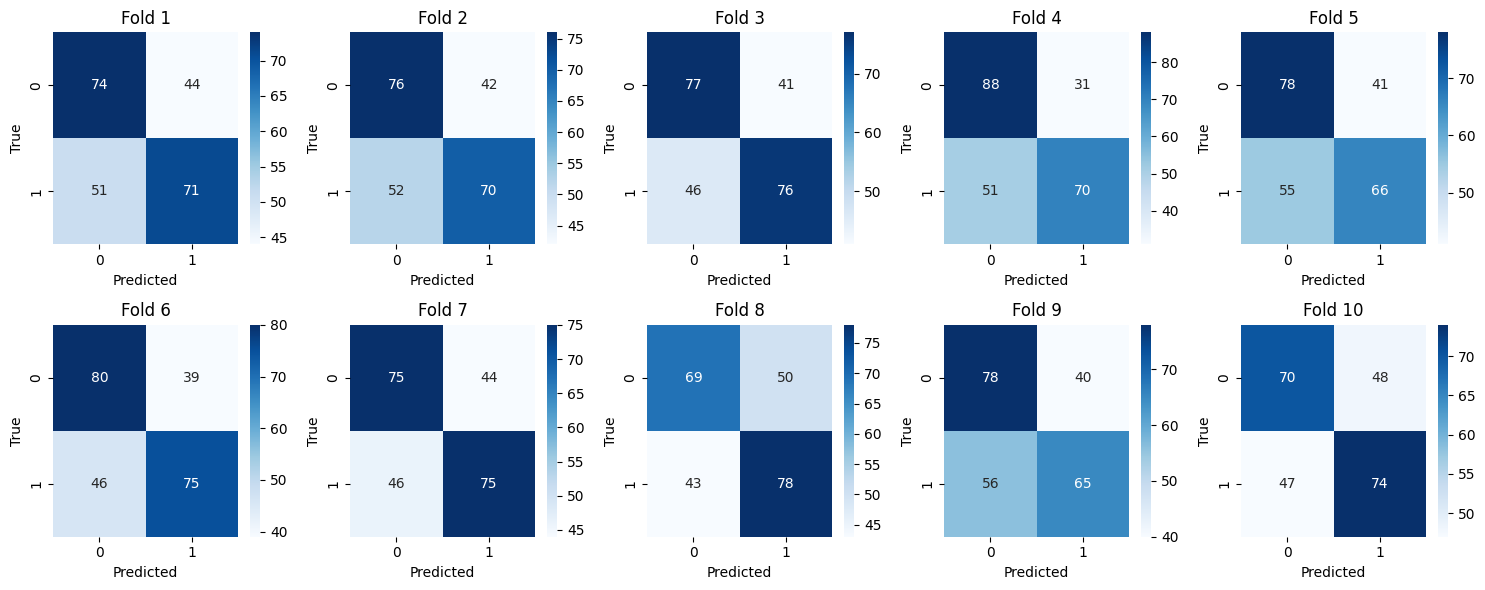

In [14]:
clfrf = RandomizedSearchCV(
    estimator = clf_RandomForest, 
    param_distributions=param_grid_RandomForest,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10
)
clfrf.fit(train_data, train_labels)

best_params = clfrf.best_params_
print("Random Forest best parameters:", best_params)

accuracy_score_scores1 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfrf.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    accuracy_score_scores1.append(report["accuracy"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

KNN best parameters: {'model__n_neighbors': 7, 'feature_selector__k': 2}
              precision    recall  f1-score   support

          NO       0.51      0.56      0.53       118
         YES       0.53      0.48      0.50       122

    accuracy                           0.52       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.52      0.52      0.52       240

              precision    recall  f1-score   support

          NO       0.43      0.40      0.41       118
         YES       0.45      0.48      0.47       122

    accuracy                           0.44       240
   macro avg       0.44      0.44      0.44       240
weighted avg       0.44      0.44      0.44       240

              precision    recall  f1-score   support

          NO       0.52      0.55      0.54       118
         YES       0.54      0.52      0.53       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
w

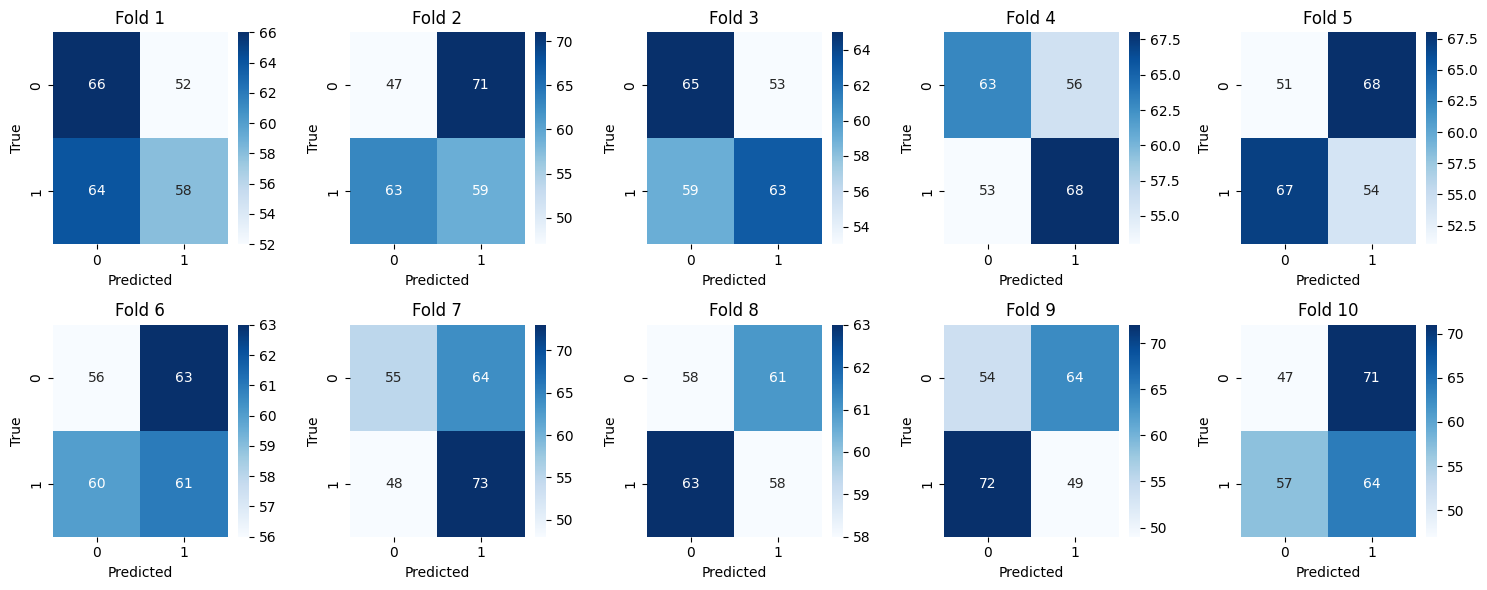

In [15]:
clfknn = RandomizedSearchCV(
    estimator = clf_KNNeighbor, 
    param_distributions=param_grid_KNNeighbor,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfknn.fit(train_data, train_labels)

best_params = clfknn.best_params_
print("KNN best parameters:", best_params)

accuracy_score_scores2 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfknn.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    accuracy_score_scores2.append(report["accuracy"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

AdaBoost best parameters: {'model__learning_rate': 0.8, 'feature_selector__k': 7}
              precision    recall  f1-score   support

          NO       0.53      0.47      0.50       118
         YES       0.54      0.59      0.56       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240

              precision    recall  f1-score   support

          NO       0.48      0.46      0.47       118
         YES       0.50      0.52      0.51       122

    accuracy                           0.49       240
   macro avg       0.49      0.49      0.49       240
weighted avg       0.49      0.49      0.49       240

              precision    recall  f1-score   support

          NO       0.52      0.48      0.50       118
         YES       0.53      0.57      0.55       122

    accuracy                           0.53       240
   macro avg       0.52      0.52      0.52   

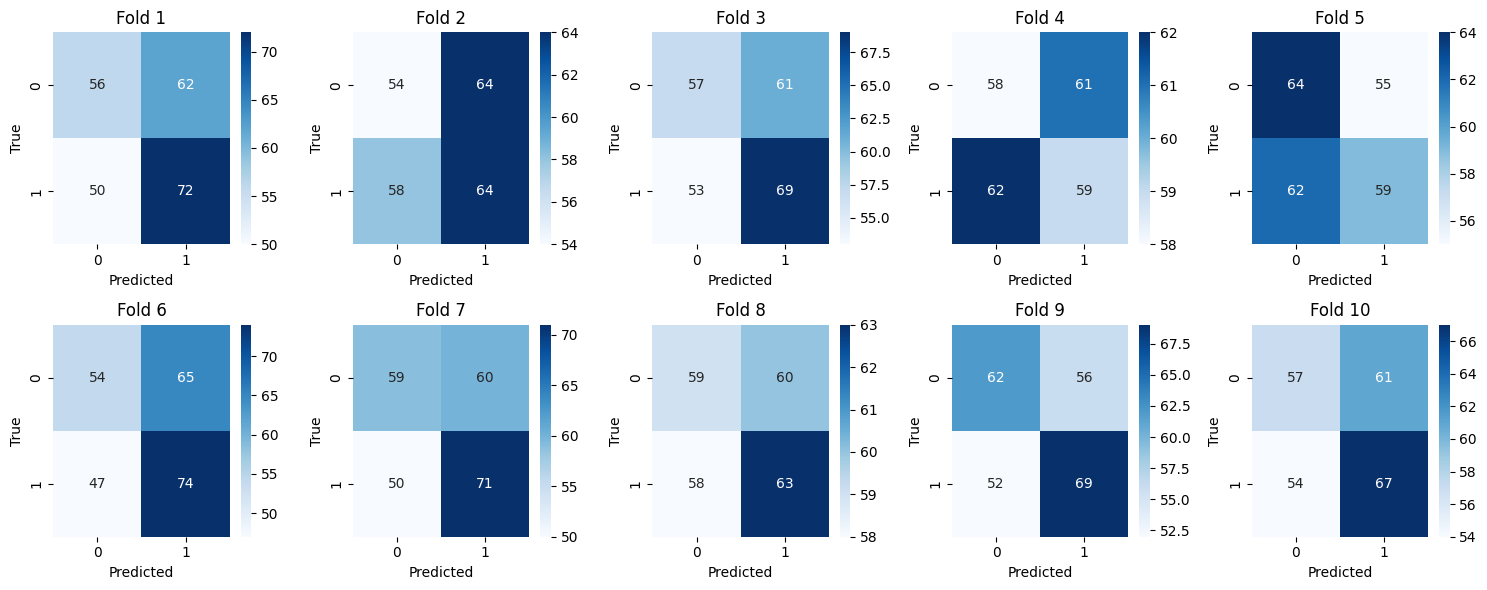

In [16]:
clfadagnb = RandomizedSearchCV(
    estimator = clf_AdaBoostGNB, 
    param_distributions=param_grid_AdaBoostGNB,
    cv = skf,
    scoring = scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=10,
)
clfadagnb.fit(train_data, train_labels)

best_params = clfadagnb.best_params_
print("AdaBoost best parameters:", best_params)

accuracy_score_scores3 = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for fold, (train_index, test_index) in enumerate(skf.split(train_data, train_labels)):
    X_fold_train, X_fold_valid = train_data.iloc[train_index], train_data.iloc[test_index]
    y_fold_train, y_fold_valid = train_labels.iloc[train_index], train_labels.iloc[test_index]

    y_pred = clfadagnb.predict(X_fold_valid)

    cm = confusion_matrix(y_fold_valid, y_pred)
    report = classification_report(y_fold_valid, y_pred, output_dict=False)
    print(report)
    report = classification_report(y_fold_valid, y_pred, output_dict=True)
    accuracy_score_scores3.append(report["accuracy"])

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[fold // 5, fold % 5])
    axes[fold // 5, fold % 5].set_title(f'Fold {fold+1}')
    axes[fold // 5, fold % 5].set_xlabel('Predicted')
    axes[fold // 5, fold % 5].set_ylabel('True')

plt.tight_layout()
plt.show()

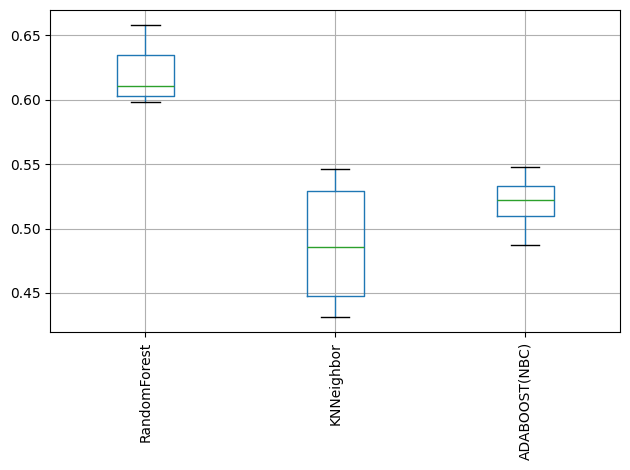

In [17]:
cv_scores = {
    'RandomForest': accuracy_score_scores1,
    'KNNeighbor': accuracy_score_scores2,
    'ADABOOST(NBC)': accuracy_score_scores3,
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


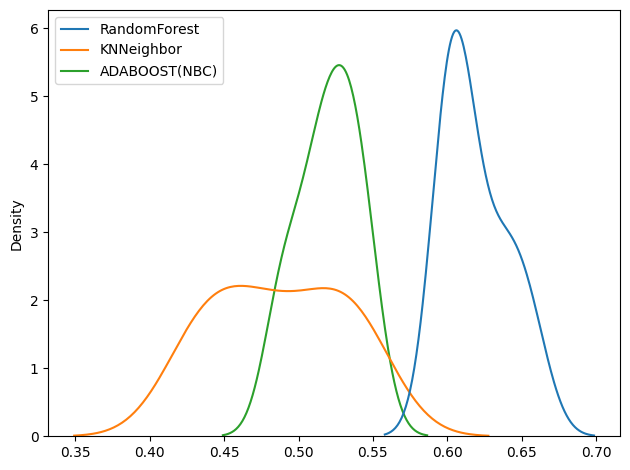

In [18]:
import scipy.stats as stats

sns.kdeplot(data=df_cv_scores)
plt.tight_layout()
plt.show()

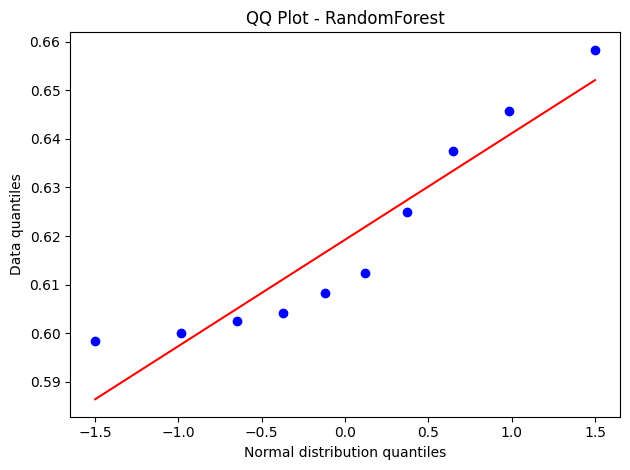

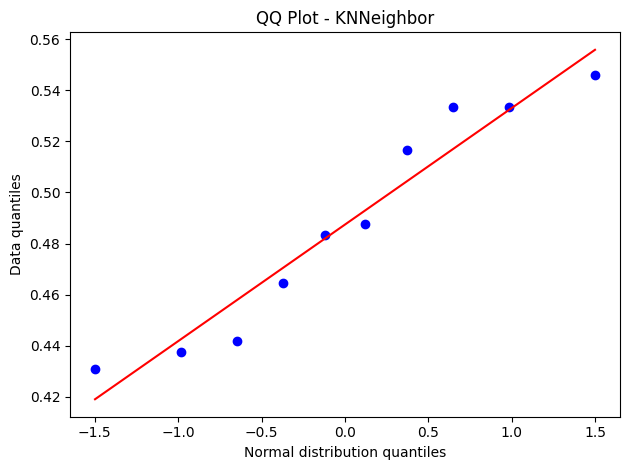

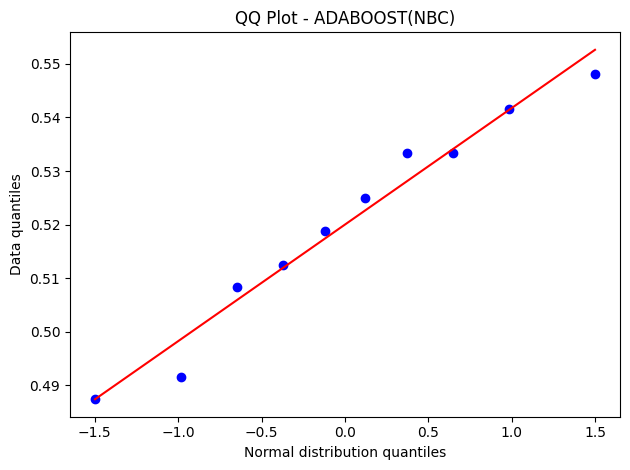

In [19]:
for i, col in enumerate(df_cv_scores.columns):
    stats.probplot(df_cv_scores[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()

    plt.show()

In [20]:
statistic, p_value = stats.levene(cv_scores["RandomForest"], 
                                 cv_scores["KNNeighbor"], 
                                 cv_scores["ADABOOST(NBC)"])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances.")
else:
    print("There is no evidence to reject the null hypothesis of equal variances.")

Levene's statistic: 4.753443181029658
p value: 0.017035351445857744
There is evidence to reject the null hypothesis of equal variances.


In [21]:
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import wilcoxon

kruskal_result = kruskal(cv_scores["RandomForest"], 
                         cv_scores["KNNeighbor"], 
                         cv_scores["ADABOOST(NBC)"])

print("Kruskal-Wallis statistic:", kruskal_result.statistic)
print("p value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least two groups.")
    models = ["RandomForest", "KNNeighbor", "ADABOOST(NBC)"]
    couples = list(combinations(models, 2))
    
    for _ in couples:
        m1, m2 = _
        wilcoxon_result = wilcoxon(cv_scores[m1], cv_scores[m2])
        
        print("Comparing", m1, "and", m2)
        print("Wilcoxon statistic:", wilcoxon_result.statistic)
        print("p value:", wilcoxon_result.pvalue)
        
        if wilcoxon_result.pvalue < 0.05:
            print("There is a statistically relevant difference between", m1, "and", m2)
        else:
            print("There is no statistically relevant difference between", m1, "and", m2)
        print("----")
else:
    print("There are no statistically relevant difference between groups.")

Kruskal-Wallis statistic: 20.711975914362174
p value: 3.1801790740125053e-05
There is a statistically relevant difference between at least two groups.
Comparing RandomForest and KNNeighbor
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and KNNeighbor
----
Comparing RandomForest and ADABOOST(NBC)
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and ADABOOST(NBC)
----
Comparing KNNeighbor and ADABOOST(NBC)
Wilcoxon statistic: 9.5
p value: 0.064453125
There is no statistically relevant difference between KNNeighbor and ADABOOST(NBC)
----


              precision    recall  f1-score   support

          NO       0.53      0.55      0.54       296
         YES       0.55      0.53      0.54       304

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



<Axes: >

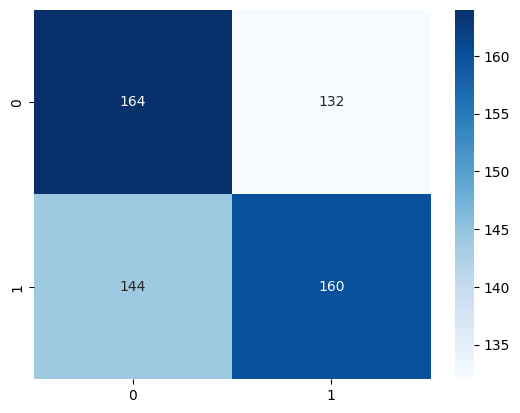

In [22]:
y_pred = clfrf.predict(test_data)

report = classification_report(test_labels, y_pred, output_dict=False)
print(report)

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')